In [46]:
%pylab inline
dat2 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_chieffi04_net.npz')
dat3 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_Nomoto2013_net.npz')
dat4 = np.load('/home/philcox/Save/OVERALL/Hogg_normalised_element_predictions_NuGrid_net_delay.npz')
dat5 = np.load('/home/philcox/Save/OVERALL/Hogg_normalised_element_predictions_NuGrid_net_rapid.npz')
dat6 = np.load('/home/philcox/Save/OVERALL/Hogg_normalised_element_predictions_West15_net.npz')

name_list = ['C04','N13','W17','R17d','R17r']
shape_list = ['o','s','*','^','v']
color_list = ['r','b','m','k','c']

data_list = [dat2,dat3,dat6,dat4,dat5]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = dat2['elements']
scores = [dat['scores'] for dat in [dat2,dat3]]
norm_scores = [dat['normalised_scores'] for dat in [dat6,dat4,dat5]]

dat2.close()
dat3.close()
dat4.close()
dat5.close()
dat6.close()

Populating the interactive namespace from numpy and matplotlib


/home/philcox/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [47]:
#  Reorder
alpha_names = ['He','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [48]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

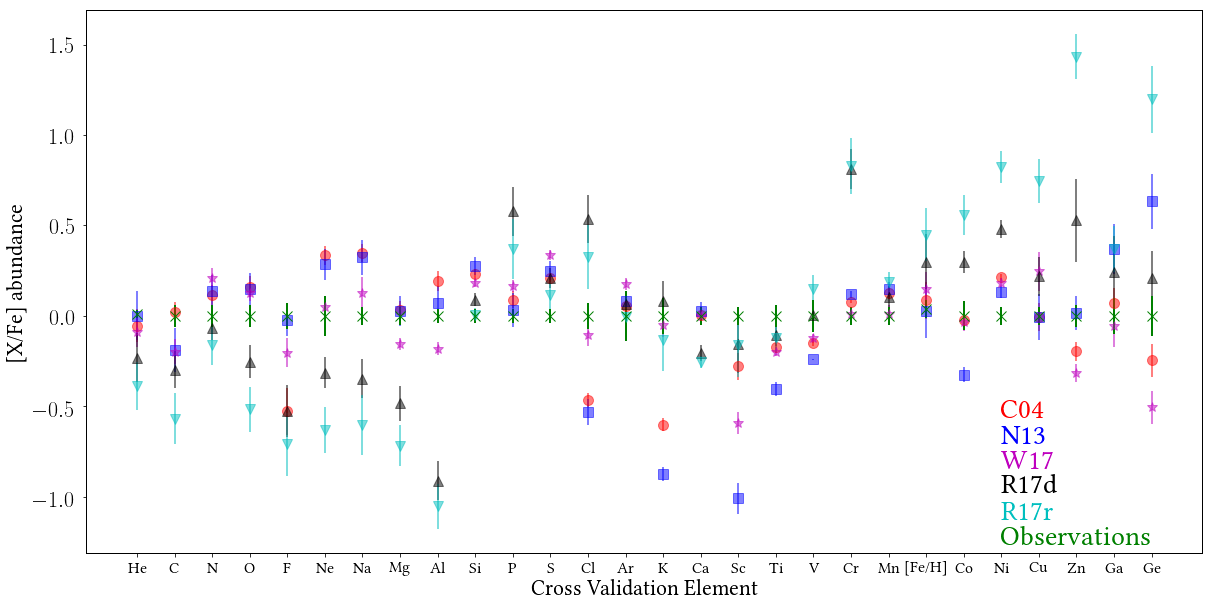

In [49]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
small_text = 16
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(5):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],yerr=alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(23,-0.56-0.14*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(23,-0.56-0.14*5,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
#elements = alpha_names.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/element_prediction.pdf',dpi=300,bbox_inches='tight')

In [13]:
# Table of scores
print('Yield Set \t LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.1f + %.1f - %.1f' %(name_list[i],np.median(scores[i]),
                                     np.percentile(scores[i],100-15.865)-np.median(scores[i]),
                                     np.median(scores[i])-np.percentile(scores[i],15.865)))

Yield Set 	 LOO-CV Score
---------------------------------
C04: 		 -28.3 + 0.1 - 0.5
N13: 		 -56.3 + 1.0 - 0.7


## Rescaling 

In [50]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

# Table of scores
n_el = 28#len(a.initial_neural_names)
print('Yield Set \t Rescaled LOO-CV Score')
print('---------------------------------')
for i in range(2):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))
for j in range(3):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[j+2],np.median(norm_scores[j]), np.percentile(norm_scores[j],100-15.865)-np.median(norm_scores[j]),
                                     np.median(norm_scores[j])-np.percentile(norm_scores[j],15.865)))

Yield Set 	 Rescaled LOO-CV Score
---------------------------------
C04: 		 -1.01 + 0.01 - 0.02
N13: 		 -2.01 + 0.04 - 0.03
W17: 		 -1.03 + 0.02 - 0.02
R17d: 		 -1.68 + 0.05 - 0.04
R17r: 		 -3.40 + 0.05 - 0.05


In [45]:
d=np.load('/home/philcox/Save/OVERALL/Bayes_score - West15_net, Karakas_net_yield, Seitenzahl.npz')
print(np.log10(d['score']))
print(d['score_err']/(d['score']*np.log(10)))
e = np.load('/home/philcox/Save/OVERALL/Bayes_score - NuGrid_netRapid, Karakas_net_yield, Seitenzahl.npz')
print(np.log10(e['score']))

-0.662704297999
0.0029515753015
-12.4546665425


### Rapid vs Delay

In [3]:
from Chempy.yields import SN2_feedback
rsn2 = SN2_feedback()
getattr(rsn2,'NuGrid_net')(model_type='rapid')
dsn2 = SN2_feedback()
getattr(dsn2,'NuGrid_net')(model_type='delay')

In [4]:
for item in rsn2.table[rsn2.metallicities[4]].dtype.names:
    print(item,rsn2.table[rsn2.metallicities[4]][2][item],dsn2.table[rsn2.metallicities[4]][2][item])

Mass 20.0 20.0
mass_in_remnants 0.088 0.141
unprocessed_mass_in_winds 0.91201575336 0.858975574281
H -0.3139 -0.286906402794
He 0.109833333333 0.130428987194
Li 3.08051598526e-09 5.64602399641e-09
B 6.49385252632e-09 1.74825901956e-08
C 0.0114238635088 0.0113727917811
N 0.0011902737193 0.00134934345052
O 0.127173687018 0.118843225751
F 4.10780789474e-09 4.86156647264e-09
Ne 0.0142594458772 0.00934799488359
Na 7.34248822807e-05 3.57283052736e-05
Mg 0.00747639217544 0.00675035925262
Al 9.97158317544e-05 8.7536992631e-05
Si 0.00520182012281 0.00662240237369
P 5.5968764193e-05 4.93642490489e-05
Pb 2.11460526316e-12 1.65965075669e-12
S 0.00202794201754 0.00174451945867
Cl 8.81213692982e-06 7.74988711874e-06
Ar 0.000481125224561 0.000203254625844
K 2.84393596491e-06 4.12152759022e-06
Ca 1.05128649123e-05 7.92133377183e-05
Sc 8.50335292982e-08 3.92078089639e-09
Ti 8.35430061404e-06 2.7638387078e-07
V 1.57232690105e-05 1.27570933644e-08
Cr 0.00400491439053 3.62543213038e-07
Mn 0.00051643637842

In [11]:
rsn2.table[0.0001][2]['Fe']

0.014598341701754386

In [10]:
dsn2.masses[2]

20.0

In [14]:
(2.663E-01)/(20-1.76)-1.439E-06

0.014598341701754386